2019-Sep-20, Friday

https://www.youtube.com/watch?v=mxkGMbrobY0

https://github.com/bhattbhavesh91/pca_from_scratch_iris_dataset/blob/master/eigen_transformation_notebook.ipynb

I chanced upon this video and corresponding jupyter notebook, which gave a very nice vizualization for eigenvectors and eigenvalues. I had to try it out here!

The notes and code here are from the video and notebook given above.

- A matrix represents a linear transformation.
- Linear transformations rotate and scale vectors.
- But LTs only scale their eigenvectors.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

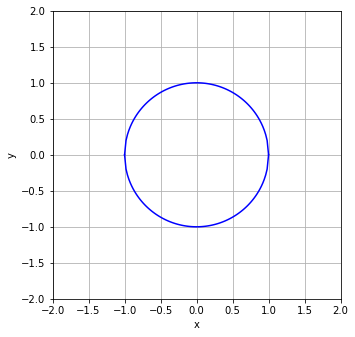

In [2]:
# Make and plot circle x^2 + y^2 = 1:

x = np.linspace(-1, 1, 101)
y1 = np.sqrt(1 - x*x)
y2 = -y1
#-----
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1], xlim=(-2, 2), ylim=(-2, 2),
                  xlabel="x", ylabel="y", aspect='equal')
ax.plot(x, y1, "b")
ax.plot(x, y2, "b")
ax.grid()
plt.show()

Consider the following transformation:
$
\quad
\begin{pmatrix} 
9 & 4 \\
4 & 3 
\end{pmatrix}
$

In [3]:
B = np.array([[9,4],[4,3]])
print(B)

[[9 4]
 [4 3]]


In [4]:
def transformation_B(x, y):
    return 9*x + 4*y, 4*x + 3*y

In [5]:
# Transforma the given circle according to B:
x1_new, y1_new = transformation_B(x, y1)
x2_new, y2_new = transformation_B(x, y2)

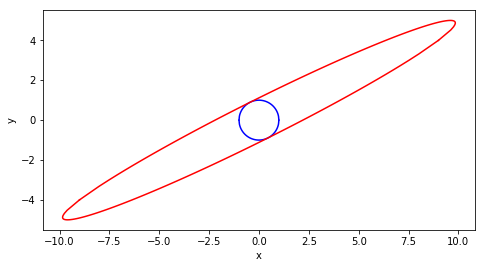

In [6]:
# Plot the original circle and the transformed circle:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1],
                  xlabel="x", ylabel="y", aspect='equal')

ax.plot(x, y1, "b")
ax.plot(x, y2, "b")

ax.plot(x1_new, y1_new, "r")
ax.plot(x2_new, y2_new, "r")

plt.show()

- The circle got transformed into an ellipse.
- The transformation has occured along an axis, characteristic of the transformation matrix B.

In [7]:
# Calculate eigenvalues, eigenvectors of the LT B:
w, v = np.linalg.eig(B)
print("Eigenvals:\n", w)
print("Eigenvecs:\n", v)

Eigenvals:
 [11.  1.]
Eigenvecs:
 [[ 0.89442719 -0.4472136 ]
 [ 0.4472136   0.89442719]]


In [8]:
print("In other words, the eigenvalue equations are:")
for ii in range(w.shape[0]):
    print("B", v[:,ii], "=", w[ii], v[:,ii])
print("...where B is given above.")

In other words, the eigenvalue equations are:
B [0.89442719 0.4472136 ] = 11.0 [0.89442719 0.4472136 ]
B [-0.4472136   0.89442719] = 1.0 [-0.4472136   0.89442719]
...where B is given above.


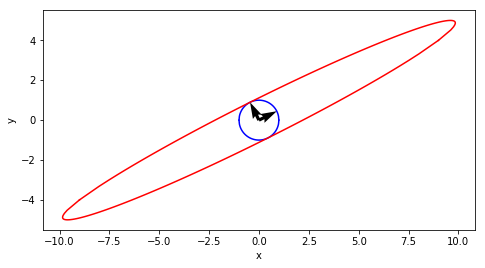

In [9]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1],
                  xlabel="x", ylabel="y", aspect='equal')

# Plot the original circle:
ax.plot(x, y1, "b")
ax.plot(x, y2, "b")


# Plot the transformed circle:
ax.plot(x1_new, y1_new, "r")
ax.plot(x2_new, y2_new, "r")

# Plot the eigenvectors:
for ii in range(w.shape[0]):
    ax.quiver(0, 0, v[0,ii], v[1,ii], angles='xy', scale_units='xy', scale=1)

plt.show()

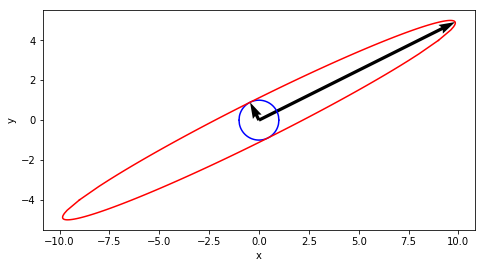

In [10]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1],
                  xlabel="x", ylabel="y", aspect='equal')

# Plot the original circle:
ax.plot(x, y1, "b")
ax.plot(x, y2, "b")

# Plot the transformed circle:
ax.plot(x1_new, y1_new, "r")
ax.plot(x2_new, y2_new, "r")

# Plot the eigenvectors scaled according to eigenvalues:
for ii in range(w.shape[0]):
    ax.quiver(0, 0, w[ii]*v[0,ii], w[ii]*v[1,ii], angles='xy', scale_units='xy', scale=1)

plt.show()